In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [475]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [476]:
data = pd.read_csv('/content/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.00,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.10,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.60,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.00,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.90,1,3,2,0


***Understanding Data***


*   age     -     Age in years

*   sex     -     Gender
        1 = Male
        0 = Female

*   cp      -     Chest Pain Types
        0 = Typical Angina
        1 = Atypical Angina
        2 = Non-anginal pain
        3 = Asymptomatic

*   trestbps - Resting blood pressure (in mm Hg)

*   chol - Serum Cholestrol (in mg/dl)

*   fbs - Fasting Blood Sugar > 120 mg/dl
        1 = true
        0 = false

*   restecg - Resting ECG results
        0 = normal
        1 = abnormality ST-T wave abnormality
        2 =  Showing probable or definite left ventricular hypertrophy by Estes' criteria

*   thalach - Maximum Heart rate achieved

*   exang - Exercise induced Angina
        1 = Yes
        0 = No

*   oldpeak - ST depression induced by exercise

*   slope - Slope of Peak exercise ST
        0 = Unsloping
        1 = flat
        2 = Downslopping

*   ca - No. of Major Vessels (0-3) (Flouroscopy)

*   thal - Thalassemia
        1 = normal
        2 = fixed defect
        3 = reversable defect

*   target - Presence or absence of disease
        1 = Yes
        0 = No









***Describing Data***

In [477]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [478]:
data.shape

(1025, 14)

In [479]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


### **Data Cleaning**

***Check for null/missing/invalid/duplicated data***

In [480]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [481]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

***Check null/missing/invalid data [Columnwise]***

In [482]:
data['sex'].nunique()

2

In [483]:
data['cp'].unique()

array([0, 1, 2, 3])

In [484]:
data['fbs'].unique()

array([0, 1])

In [485]:
data['restecg'].unique()

array([1, 0, 2])

In [486]:
data['thalach'].unique()

array([168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 136, 192, 156,
       142, 109, 162, 165, 148, 172, 173, 146, 179, 152, 117, 115, 112,
       163, 147, 182, 105, 150, 151, 169, 166, 178, 132, 160, 123, 139,
       111, 180, 164, 202, 157, 159, 170, 138, 175, 158, 126, 143, 141,
       167,  95, 190, 118, 103, 181, 108, 177, 134, 120, 171, 149, 154,
       153,  88, 174, 114, 195, 133,  96, 124, 131, 185, 194, 128, 127,
       186, 184, 188, 130,  71, 137,  99, 121, 187,  97,  90, 129, 113])

In [487]:
data['exang'].unique()

array([0, 1])

In [488]:
data['slope'].unique()

array([2, 0, 1])

In [489]:
data['ca'].unique()

array([2, 0, 1, 3, 4])

*Check and remove the duplicates*

In [490]:
data.duplicated().sum()

723

In [491]:
data.drop_duplicates(inplace = True)

*ca column refers to the number of major vessels defined by integer 0 - 3. 4 is an invalid value*

In [492]:
data.drop(data[data['ca'] == 4].index, inplace=True)

In [493]:
data['ca'].value_counts()

ca
0    175
1     65
2     38
3     20
Name: count, dtype: int64

In [494]:
data['ca'] = data['ca'].replace({0:3, 1:2, 2:1, 3:0})

In [495]:
data['ca'].value_counts()

ca
3    175
2     65
1     38
0     20
Name: count, dtype: int64

In [496]:
data['thal'].unique()

array([3, 2, 1, 0])

In [497]:
data['target'].unique()

array([0, 1])

### **Data Processing**

Normalize the numerical features.

Age, Blood Pressure, Cholesterol, Max Heart Rate, and Old Peak

In [498]:
#Normalize age using Scaling to Range Technique

min_max_scaler = MinMaxScaler()
data['normalized_age'] = min_max_scaler.fit_transform(data[['ca']])
data['normalized_age']


0     0.33
1     1.00
2     1.00
3     0.67
4     0.00
      ... 
723   1.00
733   1.00
739   0.67
843   1.00
878   0.67
Name: normalized_age, Length: 298, dtype: float64

In [499]:
#Normalize Cholesterol as

'''
  chol < 200 - 0     (Normal)
  200 <= chol <= 239 - 1 (Moderate)
  chol >= 240 - 2    (High)
'''

def normalize_chol(c):
  if c < 200:
    return 0
  elif c >= 200 and c <= 239:
    return 1
  else:
    return 2

data['normalized_chol'] = data['chol'].apply(normalize_chol)
data['normalized_chol']

0      1
1      1
2      0
3      1
4      2
      ..
723    1
733    0
739    2
843    2
878    0
Name: normalized_chol, Length: 298, dtype: int64

In [500]:
#Normalize blood pressure as

'''
  trestbps < 120 - 0 (Normal)
  129 <= trestbps <= 129 - 1 (Elevated)
  130 <= trestbps <= 139 - 2 (Hypertension - Stage 1)
  140 <= trestbps <= 179 - 3 (Hypertension - Stage 2)
  trestbps >= 180 - 4 (Hypertensive Crisis)
'''

def normalize_bps(b):
  if b < 120:
    return 0
  elif b >= 129 and b <= 129:
    return 1
  elif b >= 130 and b <= 139:
    return 2
  elif b >= 140 and b <= 179:
    return 3
  else:
    return 4

data['normalized_trestbps'] = data['trestbps'].apply(normalize_bps)
data['normalized_trestbps']

0      4
1      3
2      3
3      3
4      2
      ..
723    4
733    0
739    4
843    3
878    4
Name: normalized_trestbps, Length: 298, dtype: int64

In [501]:
#Normalize Heart Rate Using Z-Score as it does not contain extreme outliers and does not need clipping

scaler = StandardScaler()
data['normalized_thalach'] = scaler.fit_transform(data[['thalach']])

data['normalized_age']

0     0.33
1     1.00
2     1.00
3     0.67
4     0.00
      ... 
723   1.00
733   1.00
739   0.67
843   1.00
878   0.67
Name: normalized_age, Length: 298, dtype: float64

In [502]:

#Normalize old peak using Z-score

data['normalized_oldpeak'] = scaler.fit_transform(data[['oldpeak']])
data['normalized_oldpeak']

0     -0.05
1      1.76
2      1.33
3     -0.91
4      0.73
       ... 
723    0.38
733   -0.39
739   -0.91
843   -0.91
878    0.30
Name: normalized_oldpeak, Length: 298, dtype: float64

### **Data Analysis**

Performed----

In [503]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,normalized_age,normalized_chol,normalized_trestbps,normalized_thalach,normalized_oldpeak
0,52,1,0,125,212,0,1,168,0,1.00,2,1,3,0,0.33,1,4,0.81,-0.05
1,53,1,0,140,203,1,0,155,1,3.10,0,3,3,0,1.00,1,3,0.24,1.76
2,70,1,0,145,174,0,1,125,1,2.60,0,3,3,0,1.00,0,3,-1.07,1.33
3,61,1,0,148,203,0,1,161,0,0.00,2,2,3,0,0.67,1,3,0.50,-0.91
4,62,0,0,138,294,1,1,106,0,1.90,1,0,2,0,0.00,2,2,-1.89,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.50,1,3,2,1,1.00,1,4,-1.50,0.38
733,44,0,2,108,141,0,1,175,0,0.60,1,3,2,1,1.00,0,0,1.11,-0.39
739,52,1,0,128,255,0,1,161,1,0.00,2,2,3,0,0.67,2,4,0.50,-0.91
843,59,1,3,160,273,0,0,125,0,0.00,2,3,2,0,1.00,2,3,-1.07,-0.91


In [504]:
data.to_csv('heart.csv', index=False)
files.download('heart.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***Separate the features and label (target variable)***

In [505]:
X = data.drop(labels = ['age', 'chol', 'trestbps', 'thalach', 'oldpeak', 'target'], axis = 1)
X

,sex,cp,fbs,restecg,exang,slope,ca,thal,normalized_age,normalized_chol,normalized_trestbps,normalized_thalach,normalized_oldpeak
0,1,0,0,1,0,2,1,3,0.33,1,4,0.81,-0.05
1,1,0,1,0,1,0,3,3,1.00,1,3,0.24,1.76
2,1,0,0,1,1,0,3,3,1.00,0,3,-1.07,1.33
3,1,0,0,1,0,2,2,3,0.67,1,3,0.50,-0.91
4,0,0,1,1,0,1,0,2,0.00,2,2,-1.89,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,0,2,0,0,0,1,3,2,1.00,1,4,-1.50,0.38
733,0,2,0,1,0,1,3,2,1.00,0,0,1.11,-0.39
739,1,0,0,1,1,2,2,3,0.67,2,4,0.50,-0.91
843,1,3,0,0,0,2,3,2,1.00,2,3,-1.07,-0.91


In [506]:
Y = data['target']

***Split the data into training and test datasets***

In [507]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [508]:
X_train

,sex,cp,fbs,restecg,exang,slope,ca,thal,normalized_age,normalized_chol,normalized_trestbps,normalized_thalach,normalized_oldpeak
628,0,3,0,1,0,2,1,2,0.33,1,3,0.07,0.64
95,0,0,0,0,1,1,3,2,1.00,1,2,0.11,-0.74
131,0,2,0,0,0,2,3,2,1.00,2,2,-0.02,-0.48
228,1,1,1,1,0,2,3,2,1.00,1,4,1.51,-0.91
333,0,2,0,1,0,1,3,2,1.00,1,0,0.37,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,1,2,0,1,0,2,3,2,1.00,2,0,0.11,-0.91
276,1,0,0,1,1,2,3,3,1.00,1,2,0.81,-0.91
145,1,0,0,0,1,1,3,3,1.00,0,0,-1.55,0.81
50,0,3,1,0,0,2,3,2,1.00,2,3,0.55,-0.05


In [509]:
Y_train

628    1
95     1
131    1
228    1
333    1
      ..
429    0
276    1
145    0
50     1
234    1
Name: target, Length: 238, dtype: int64

In [510]:
X_train = X_train.values
X_test = X_test.values

Y_train = Y_train.values
Y_test = Y_test.values

In [511]:
Y_train = Y_train.reshape(X_train.shape[0], 1)
Y_test = Y_test.reshape(X_test.shape[0], 1)

In [512]:
print(X_train.shape) #m x n
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(238, 13)
(238, 1)
(60, 13)
(60, 1)


***Sigmoid Function:***

It is an activation function that takes real value as input and outputs in between 0 and 1

> S(z) = 1 / (1 + e^(-z))



In [513]:
def sigmoid_function(z):
  return 1 / (1 + np.exp(-z))

***Predict Function:***
The basic function is y = mx + c. For logistic regression:

> Y = WX + B

> Y = W0X0 + W1X1 + W2X2 + W3X3 ..... W12X12 + B

W = Weights, X = Features and B = Bias

In [514]:
def predict(x, w, b):
  z = np.dot(x, w) + b
  return sigmoid_function(z)

***Cost Function:***

As the prediction function is non-linear due to sigmoid activation function. The cost will be calculated using **Cross Entropy**



In [515]:
def cost_function(x, y, w, b):

  m = len(x)
  predictions = predict(x, w, b)

  cost = -(1/m)*np.sum(y*np.log(predictions) + (1-y)*np.log(1-predictions))

  return cost

***Gradient Descent:***

To minimize the cost, calculate the gradient descent of cost function. Updating the weights and bias.

>

In [516]:
def update_weights(x, y, w, b, lr ):

    m = len(x)
    p = predict(x, w, b)

    dW = (1/m) * np.dot((p-y).T, x).astype(np.float64)
    dB = (1/m)*np.sum(p - y).astype(np.float64)

    w = w - lr * dW
    b = b - lr * dB

    return w, b


***Train Function:***

In [517]:
def train(x, y, w, b, lr, iters):

  m = x.shape[0] #Number of features
  n = x.shape[1] #Number of Labels
  cost_list = []

  for i in range(iters):
    w, b = update_weights(x, y, w, b, lr)
    cost = cost_function(x, y, w, b)

    cost_list.append(cost)

    if (i % 1000 == 0):
      print(f"Iteration:{i}, Cost:{cost}")

  return w, b, cost_list

***Using Xavier Weight Initialization***

In [518]:

def xavier_init(size):
    xavier_variance = 1.0 / size[0]
    return np.random.normal(0, np.sqrt(xavier_variance), size=size)

***Decision Boundary***

In [519]:
def decision_boundary(p):
  if p >= 0.5:
    return 1
  else:
    return 0

***Map Prediction Probability to Class***

In [520]:
def classify(p):
  decision_boundary = np.vectorize(decision_boundary)
  return decision_boundary(p).flatten()

In [530]:
input_size = 13
output_size = 1

# Initialize weights
W = xavier_init((input_size, output_size))
b = np.zeros((1, output_size))  # Bias initialization with zeros

iterations = 10000
learning_rate = 0.00001

w, b, cost_list = train(X_train, Y_train, W, b, learning_rate, iterations)
print(w, b)

Iteration:0, Cost:7.02664834090921
Iteration:1000, Cost:6.9877179840298425
Iteration:2000, Cost:6.953664268024284
Iteration:3000, Cost:6.924055338472647
Iteration:4000, Cost:6.8984970639894465
Iteration:5000, Cost:6.876631096982976
Iteration:6000, Cost:6.858132749202401
Iteration:7000, Cost:6.842708764155169
Iteration:8000, Cost:6.830095052858349
Iteration:9000, Cost:6.820054445269188
[[-0.58389498 -0.57044853 -0.57672249 -0.57881977 -0.58490859 -0.57981651
  -0.59053056 -0.59905526 -0.58043255 -0.59656514 -0.60654057 -0.55897023
  -0.58392738]
 [ 0.17957707  0.19265657  0.18770018  0.18498992  0.17917829  0.18267688
   0.17040243  0.16181371  0.18299569  0.16605282  0.15399386  0.20565551
   0.18053428]
 [-0.265108   -0.25188206 -0.25742823 -0.25985667 -0.26578645 -0.2615642
  -0.27311775 -0.28165764 -0.26167478 -0.27823293 -0.28931186 -0.23959257
  -0.26459981]
 [ 0.19513807  0.20843249  0.20267011  0.20033859  0.19436065  0.19883904
   0.18752901  0.1789922   0.19857989  0.18214321 

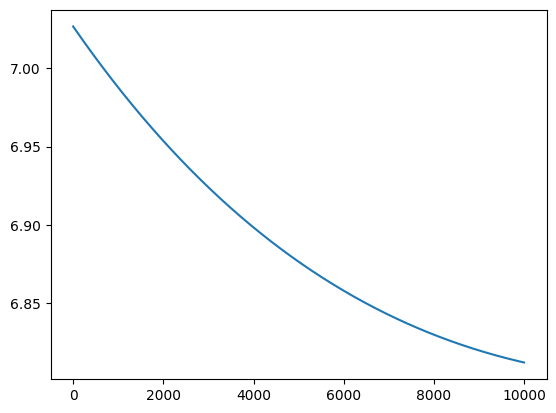

In [531]:
plt.plot(np.arange(iterations), cost_list)

In [532]:
def model_accuracy(x, y, w, b):
    A = predict(x, w, b)
    A = A > 0.5
    A = np.array(A, dtype='int64')
    accuracy = np.mean(A == y) * 100
    print("Accuracy of model is ", accuracy, "%")


In [533]:
model_accuracy(X_test, Y_test, w,b)

Accuracy of model is  80.25641025641026 %


### ***Logistic Regression Using Sklearn Library***

In [525]:
model = LogisticRegression()

In [526]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [527]:
y_pred = model.predict(X_test)

In [528]:
accuracy = accuracy_score(Y_test, y_pred)

In [529]:
print("Accuracy of the sklearn Logistic Regression model is:", accuracy*100, "%")


Accuracy of the sklearn Logistic Regression model is: 80.0 %
